# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
import pandas as pd
import numpy as np
import glob
pd.options.mode.chained_assignment = None

DATA_FOLDER = './Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [2]:
countries = "guinea" #countries = ["guinea", "liberia", "sl"]

path = DATA_FOLDER+"ebola/"+countries+"_data/"

files = glob.glob(path+"*.csv")
cols = ["Date","Description","Totals"]

df = pd.concat((pd.read_csv(f,usecols=cols,parse_dates=['Date']) for f in files),ignore_index=True)

In [3]:
df.index = df.Date

In [4]:
new_cases = df[df.Description=="Total new cases registered so far"].Totals.astype(str).astype(int)
deaths = df[df.Description=="Total deaths (confirmed + probables + suspects)"].Totals.astype(str).astype(int)

In [5]:
avg_new_cases = new_cases.resample('M').mean()
avg_deaths = deaths.resample('M').mean()

In [6]:
pd.DataFrame(avg_new_cases.values,avg_new_cases.index.month)
df_deaths = pd.DataFrame({"avg deaths":avg_deaths.values,"Month":avg_deaths.index.month})
df_deaths
#avg_deaths.index.month

,Month,avg deaths
0,8,543.2000
1,9,603.1875
2,10,739.0000


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [7]:
# Read MID files

path=DATA_FOLDER+"microbiome/"
MID_files = glob.glob(path+"MID*.xls")
MID_files

['./Data/microbiome/MID1.xls',
 './Data/microbiome/MID2.xls',
 './Data/microbiome/MID3.xls',
 './Data/microbiome/MID4.xls',
 './Data/microbiome/MID5.xls',
 './Data/microbiome/MID6.xls',
 './Data/microbiome/MID7.xls',
 './Data/microbiome/MID8.xls',
 './Data/microbiome/MID9.xls']

In [8]:
df_microbiome=pd.concat((pd.read_excel(f,index_col=0,header=None) for f in MID_files),axis=1)
df_microbiome.columns=['MID1','MID2','MID3','MID4','MID5','MID6','MID7','MID8','MID9']
df_microbiome=df_microbiome.transpose()
df_microbiome.index.names=['BARCODE']
df_microbiome

,"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus","Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermodiscus","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Hyperthermus","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrodictium","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",...,"Bacteria ""Verrucomicrobia"" Opitutae Puniceicoccales Puniceicoccaceae Puniceicoccus","Bacteria ""Verrucomicrobia"" Subdivision3 Subdivision3_genera_incertae_sedis","Bacteria ""Verrucomicrobia"" Verrucomicrobiae Verrucomicrobiales Verrucomicrobiaceae Persicirhabdus","Bacteria ""Verrucomicrobia"" Verrucomicrobiae Verrucomicrobiales Verrucomicrobiaceae Verrucomicrobium",Bacteria Cyanobacteria Cyanobacteria Chloroplast Bangiophyceae,Bacteria Cyanobacteria Cyanobacteria Chloroplast Chlorarachniophyceae,Bacteria Cyanobacteria Cyanobacteria Chloroplast Streptophyta,Bacteria OD1 OD1_genera_incertae_sedis,Bacteria OP11 OP11_genera_incertae_sedis,Bacteria TM7 TM7_genera_incertae_sedis
BARCODE,,,,,,,,,,,,,,,,,,,,,
MID1,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,2.0,85.0,1388.0,NaN,NaN,NaN
MID2,2.0,14.0,23.0,NaN,1.0,NaN,2.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0
MID3,1.0,15.0,14.0,NaN,4.0,1.0,1.0,NaN,3.0,NaN,...,2.0,NaN,2.0,1.0,1.0,4.0,54.0,1.0,26.0,NaN
MID4,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,44.0,NaN,NaN,NaN
MID5,5.0,26.0,28.0,1.0,5.0,NaN,2.0,NaN,2.0,3.0,...,4.0,NaN,NaN,NaN,2.0,5.0,59.0,4.0,NaN,NaN
MID6,NaN,NaN,7.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
MID7,NaN,1.0,8.0,NaN,2.0,NaN,1.0,NaN,1.0,1.0,...,NaN,4.0,9.0,39.0,1.0,2.0,NaN,NaN,NaN,NaN
MID8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN
MID9,NaN,1.0,16.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,10.0,NaN,NaN,NaN


In [9]:
df_microbiome.columns=[i for i in range(0,9)]

ValueError: Length mismatch: Expected axis has 775 elements, new values have 9 elements

In [10]:
df_metadata=pd.read_excel('Data/microbiome/metadata.xls',index_col='BARCODE')
df_metadata

,GROUP,SAMPLE
BARCODE,,
MID1,EXTRACTION CONTROL,NaN
MID2,NEC 1,tissue
MID3,Control 1,tissue
MID4,NEC 2,tissue
MID5,Control 2,tissue
MID6,NEC 1,stool
MID7,Control 1,stool
MID8,NEC 2,stool
MID9,Control 2,stool


In [11]:
df_merged=pd.merge(df_microbiome, df_metadata, left_index=True, right_index=True)
df_merged

,"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus","Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermodiscus","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Hyperthermus","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrodictium","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",...,"Bacteria ""Verrucomicrobia"" Verrucomicrobiae Verrucomicrobiales Verrucomicrobiaceae Persicirhabdus","Bacteria ""Verrucomicrobia"" Verrucomicrobiae Verrucomicrobiales Verrucomicrobiaceae Verrucomicrobium",Bacteria Cyanobacteria Cyanobacteria Chloroplast Bangiophyceae,Bacteria Cyanobacteria Cyanobacteria Chloroplast Chlorarachniophyceae,Bacteria Cyanobacteria Cyanobacteria Chloroplast Streptophyta,Bacteria OD1 OD1_genera_incertae_sedis,Bacteria OP11 OP11_genera_incertae_sedis,Bacteria TM7 TM7_genera_incertae_sedis,GROUP,SAMPLE
BARCODE,,,,,,,,,,,,,,,,,,,,,
MID1,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,2.0,85.0,1388.0,NaN,NaN,NaN,EXTRACTION CONTROL,NaN
MID2,2.0,14.0,23.0,NaN,1.0,NaN,2.0,1.0,NaN,2.0,...,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,NEC 1,tissue
MID3,1.0,15.0,14.0,NaN,4.0,1.0,1.0,NaN,3.0,NaN,...,2.0,1.0,1.0,4.0,54.0,1.0,26.0,NaN,Control 1,tissue
MID4,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,44.0,NaN,NaN,NaN,NEC 2,tissue
MID5,5.0,26.0,28.0,1.0,5.0,NaN,2.0,NaN,2.0,3.0,...,NaN,NaN,2.0,5.0,59.0,4.0,NaN,NaN,Control 2,tissue
MID6,NaN,NaN,7.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NEC 1,stool
MID7,NaN,1.0,8.0,NaN,2.0,NaN,1.0,NaN,1.0,1.0,...,9.0,39.0,1.0,2.0,NaN,NaN,NaN,NaN,Control 1,stool
MID8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NEC 2,stool
MID9,NaN,1.0,16.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,1.0,10.0,NaN,NaN,NaN,Control 2,stool


In [12]:
df_merged.fillna('unknown',inplace=True)
df_merged

,"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus","Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermodiscus","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Hyperthermus","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrodictium","Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",...,"Bacteria ""Verrucomicrobia"" Verrucomicrobiae Verrucomicrobiales Verrucomicrobiaceae Persicirhabdus","Bacteria ""Verrucomicrobia"" Verrucomicrobiae Verrucomicrobiales Verrucomicrobiaceae Verrucomicrobium",Bacteria Cyanobacteria Cyanobacteria Chloroplast Bangiophyceae,Bacteria Cyanobacteria Cyanobacteria Chloroplast Chlorarachniophyceae,Bacteria Cyanobacteria Cyanobacteria Chloroplast Streptophyta,Bacteria OD1 OD1_genera_incertae_sedis,Bacteria OP11 OP11_genera_incertae_sedis,Bacteria TM7 TM7_genera_incertae_sedis,GROUP,SAMPLE
BARCODE,,,,,,,,,,,,,,,,,,,,,
MID1,unknown,unknown,7,unknown,unknown,unknown,unknown,unknown,unknown,2,...,unknown,unknown,2,85,1388,unknown,unknown,unknown,EXTRACTION CONTROL,unknown
MID2,2,14,23,unknown,1,unknown,2,1,unknown,2,...,unknown,unknown,unknown,1,2,unknown,unknown,2,NEC 1,tissue
MID3,1,15,14,unknown,4,1,1,unknown,3,unknown,...,2,1,1,4,54,1,26,unknown,Control 1,tissue
MID4,unknown,unknown,2,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,6,44,unknown,unknown,unknown,NEC 2,tissue
MID5,5,26,28,1,5,unknown,2,unknown,2,3,...,unknown,unknown,2,5,59,4,unknown,unknown,Control 2,tissue
MID6,unknown,unknown,7,unknown,1,unknown,unknown,unknown,1,2,...,1,1,unknown,unknown,unknown,unknown,unknown,unknown,NEC 1,stool
MID7,unknown,1,8,unknown,2,unknown,1,unknown,1,1,...,9,39,1,2,unknown,unknown,unknown,unknown,Control 1,stool
MID8,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,1,4,unknown,unknown,unknown,unknown,NEC 2,stool
MID9,unknown,1,16,unknown,2,unknown,unknown,unknown,5,unknown,...,unknown,unknown,unknown,1,10,unknown,unknown,unknown,Control 2,stool


In [13]:
df_merged.index.is_unique

True

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [14]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [41]:
# import titanic.xls

tf = pd.read_excel(DATA_FOLDER+'titanic.xls')
tf = tf.rename(columns={'home.dest':'homedest'})

In [21]:
tf

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [22]:
pd.DataFrame({'Min':pd.DataFrame.min(tf),'Max':pd.DataFrame.max(tf) })

,Max,Min
pclass,3.0000,1.0000
survived,1.0000,0.0000
age,80.0000,0.1667
sibsp,8.0000,0.0000
parch,9.0000,0.0000
fare,512.3292,0.0000
body,328.0000,1.0000


In [23]:
tf.sex.unique()

array(['female', 'male'], dtype=object)

In [24]:
tf.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

### 1. Type and value range of each attribute
- Pclass : integer value in range 1-3
- Survived : integer value in range 0-1
- Name : string
- Sex : string 'female' or 'male'
- Age : double value in range 0.1667 - 80
- Sibsp : double value in range 0-8
- Parch : double value in range 0-9
- Ticket : string 
- Fare : double value in range 0-512.3292
- Cabin : string
- Embarked : character that can take value S, C or Q
- Boat : string
- Body : double value in range 1-328
- Home destination : String 

We could say that the attributes 'pclass', 'sex', 'survived', and 'embarked' can be categorical. We then cast them as category.


In [25]:
# transform the concerned attributes into categories
tf['pclass'] = tf.pclass.astype('category')
tf['sex'] = tf.sex.astype('category')
tf['survived'] = tf.survived.astype('category')
tf['embarked'] = tf.embarked.astype('category')

### 2. Histograms

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram function
def hist(t, data, labs, rot):
    fig, ax = plt.subplots()
    ax.set_title(t, fontsize=15, fontweight='bold')
    sns.barplot(labs, data, ax=ax)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=rot)
    

- Travel class

In [27]:
hist('Travel Class', tf.pclass.value_counts(sort=False), tf.pclass.value_counts(sort=False).keys(), 0)

- Embarkation port

In [28]:
hist('Embarkation port', tf.embarked.value_counts(sort=False), tf.embarked.value_counts(sort=False).keys(), 0)

- Sex

In [29]:
hist('Gender', tf.sex.value_counts(sort=False), tf.sex.value_counts(sort=False).keys(), 0)

- Age (Discrete decades interval)

In [30]:
# divide data into age intervals
decade_int = pd.cut(tf.age, [0,9,19,29,39,49,59,69,79, 89], labels=['<10','10\'s','20\'s','30\'s', '40\'s', '50\'s', '60\'s','70\'s', '80\'s'])

hist("Age", decade_int.value_counts(sort=False), decade_int.value_counts(sort=False).keys(), 0)

### 3. Passengers on each cabin floor

In [31]:
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# pie chart function
def piechart(t, counts, labels):
    #plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=False, startangle=140)
    patches, texts = plt.pie(counts, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.title(t)
    plt.tight_layout()
    plt.show()

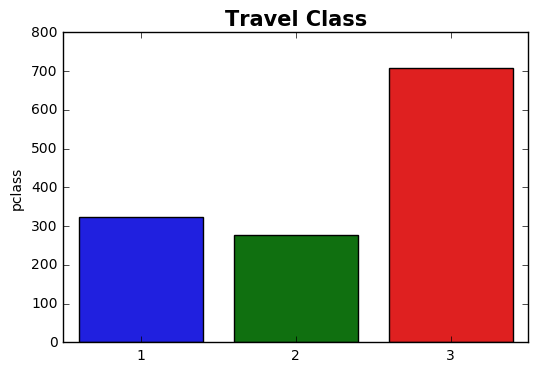

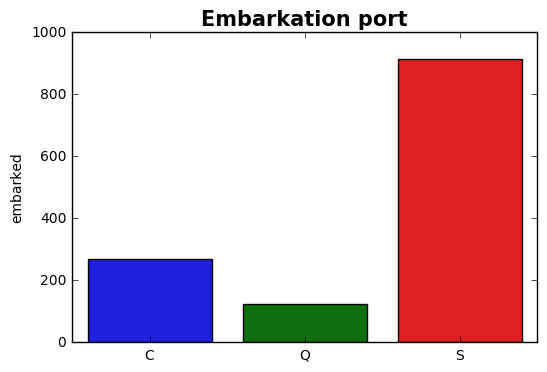

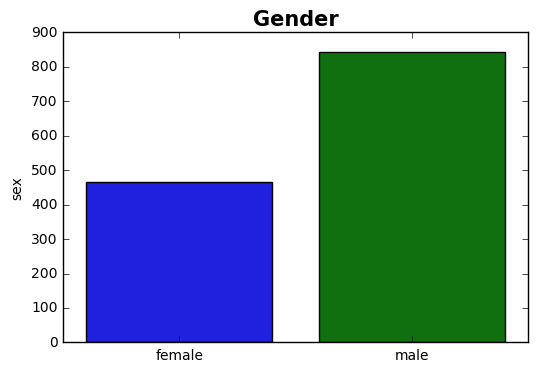

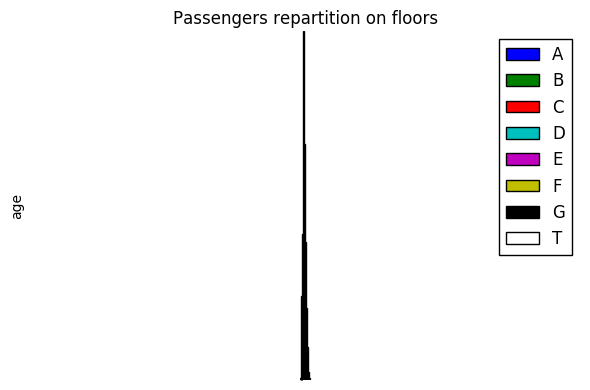

In [32]:
# distinguish the different floors
floors = tf['cabin'].dropna().astype(str).str[0]
floors = floors.astype('category')

piechart("Passengers repartition on floors", floors.value_counts(), floors.cat.categories)


### 4. Survivors for each travel class

In [33]:
# group the datas by travel class
pclass_grouped = tf.groupby(tf.pclass)

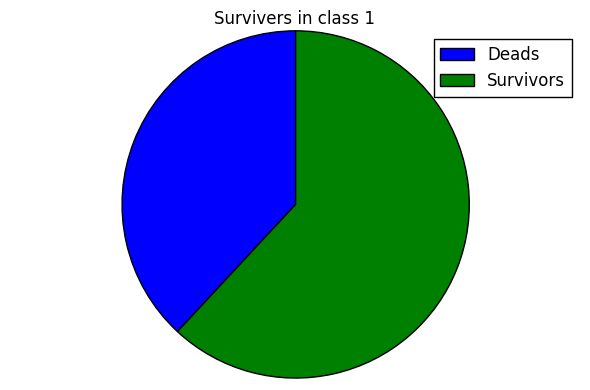

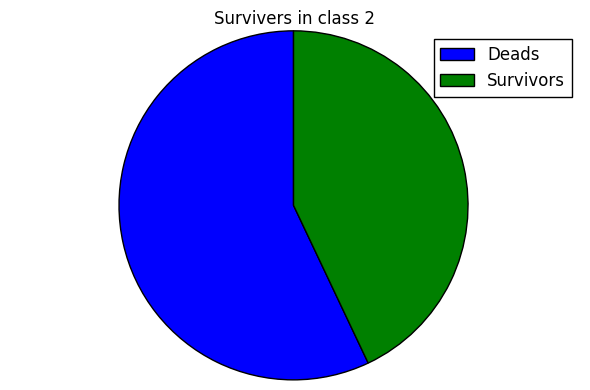

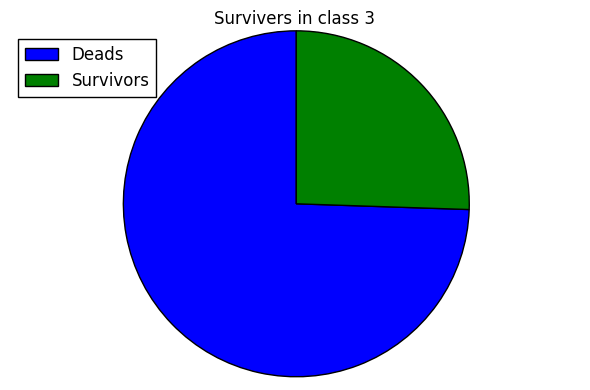

In [34]:
for pc, group in pclass_grouped:
    piechart("Survivers in class " + str(pc), group.survived.value_counts(sort=False), ["Deads", "Survivors"])

### 5. Proportion of survivors by travel class and sex

In [35]:
def percent(x):
    return 100*x[1]/(x[0]+x[1])

# group the datas by travel class and sex
trav_sex_grouped = tf.groupby(['pclass', 'sex'])
values_hist = list()
labs = list()

for p, group in trav_sex_grouped:
    res = group.survived.value_counts(sort=False)
    values_hist.append(percent((group.survived.value_counts(sort=False).values)))
    labs.append(str(p[1]) + " in class " + str(p[0]) + "")


In [36]:
hist("Prop", values_hist, labs, 67)

### 6. Survival proportion by age category, travel class and sex

In [37]:
# separate population in 2 age equal intervals
tf_age = pd.qcut(tf.age, 2)

# group the datas by travel class, sex and our age interval
tf_grouped = tf.groupby(['pclass', 'sex', tf_age])

In [38]:
indx = list()
data_res = list()
for p, group in tf_grouped :
    indx.append(str(p[1]+" in class "+str(p[0]) + ", age in " + str(p[2])))
    data_res.append(percent((group.survived.value_counts(sort=False)).values))

In [39]:
pd.DataFrame(data_res, index=indx, columns=['Percentage']).transpose()

,"female in class 1, age in [0.167, 28]","female in class 1, age in (28, 80]","male in class 1, age in [0.167, 28]","male in class 1, age in (28, 80]","female in class 2, age in [0.167, 28]","female in class 2, age in (28, 80]","male in class 2, age in [0.167, 28]","male in class 2, age in (28, 80]","female in class 3, age in [0.167, 28]","female in class 3, age in (28, 80]","male in class 3, age in [0.167, 28]","male in class 3, age in (28, 80]"
Percentage,95.121951,96.73913,53.125,30.252101,91.071429,87.234043,21.621622,8.333333,51.376147,37.209302,18.303571,14.4
